In the simulation, we cannot make the boxsize to infinity. Therefore to compare the results between theory and simulation, we should do the cut-off in the theory correlation function to the size of simulation box and compare between those two.

The k cut-off value depends on the boxsize as

$k_{min}  = \frac{2\pi}{r_{max}} = \frac{2\pi}{2000 \sqrt{3}} = \frac{\pi}{\sqrt{3}}10^{-3}$ 

with $r_{max}  = L\sqrt{3}$.

The idea to cut is that we have the correlation function which is the Fourier transform of power spectrum, integral from $\int_0^\infty dk$, that integral equal to the sum of two integral with the boundaries are

\begin{align}
    \int_0^\infty dk = \int_0^{k_{min}} dk + \int_{k_{min}}^\infty dk.
\end{align}

However from CLASS, we get the boundary of this integral is from $\int_{10^{-4}}^{10^2} dk$. Therefore
\begin{align}
    \int_{10^{-4}}^{10^2} dk = \int_{10^{-4}}^{k_{min}} dk + \int_{k_{min}}^{10^2} dk.
\end{align}

We already had the correlation function with the integral from $\int_{10^{-4}}^{10^2} dk$, to get the cut-off value, we should subtract it to that of $\int_{10^{-4}}^{k_{min}} dk$. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hankel import HankelTransform
from scipy.interpolate import InterpolatedUnivariateSpline as spline 
path ='/Users/ngoc/Desktop/Master-study/project'

In [6]:

#cosmological parameters
z        = 0.306                                #redshift
H_0      = 67                                   #Hubble const
Omg_lamb = 0.685                                #cosmological density parameter
Omg_m    = 1. - Omg_lamb                        #mater density parameter
a        = 1./(1. + z)                          #scale factor
f        = 0.687255861
b        = 3.11                                 #bias for halo b = \delta_halo/\delta_matter
beta     = f/b   

#relation between the real and redshift space power spectrum multipoles (Kaiser's coefficients)
K0       = 1 + 2/3*beta + 1/5*beta**2
K2       = 4/3*beta + 4/7*beta**2
K4       = 8/35*beta**2

#simulation parameters
L      = 2000. #boxsize
r_max  = L*3**0.5
k_min  = 2*np.pi/r_max
ni     = int(k_min/1e-4)                                # n = (upper_bound - lower_bound)/dk  

In [ ]:
# loading matter power spectrum

kk  = np.loadtxt(path+'/my_results/matter_Pk.txt', usecols = (0))
P   = np.loadtxt(path+'/my_results/matter_Pk.txt', usecols = (1))
r   = np.loadtxt(path+'/my-p-code/xi_dd_realspace.txt', usecols = 0)
P_k = spline(kk, P)


In [35]:
# xi_dd^s monopole cut off

xi = lambda r, k: P_k(k)*k*np.sin(k*r)
              
dk = 1e-4
xi_dd0_cut = np.full_like(r,0) 
ii = 0

for rr in r:
    xi_r = 0
    for i in range (1, ni):              #notice when choosing i to avoid divided by r=0
        xi_r = xi_r + xi(rr,i*dk)
    xi_dd0_cut[ii] = xi_r*K0*b**2*dk/(2*np.pi**2*rr)
    ii = ii+1

In [36]:
# xi_dd^s quadrupole cut off

xi = lambda r, k: P_k(k)*((k**2*r**2 - 3)*np.sin(k*r)/(k*r) + 3*np.cos(k*r))
             
dk = 1e-4
xi_dd2_cut = np.full_like(r,0) 
ii = 0

for rr in r:
    xi_r = 0
    for i in range (1, ni):              #notice when choosing i to avoid divided by r=0
        xi_r = xi_r + xi(rr,i*dk)
    xi_dd2_cut[ii] = xi_r*K2*b**2*dk/(2*np.pi**2*rr**2)
    ii = ii+1

In [37]:
xi_dd0_num = np.loadtxt(path+'/results/xi_dd_s_num_integral.txt',usecols=(1))
xi_dd2_num = np.loadtxt(path+'/results/xi_dd_s_num_integral.txt',usecols=(2))

In [38]:
xi_dd0_cutoff = xi_dd0_num - xi_dd0_cut
xi_dd2_cutoff = xi_dd2_num - xi_dd2_cut

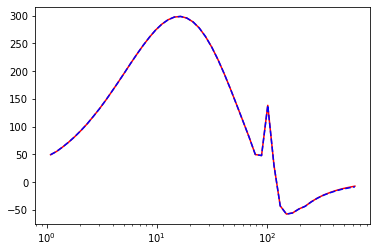

In [39]:
plt.semilogx(r, xi_dd0_num*r**2,'r-')
plt.semilogx(r, xi_dd0_cutoff*r**2,'b--')

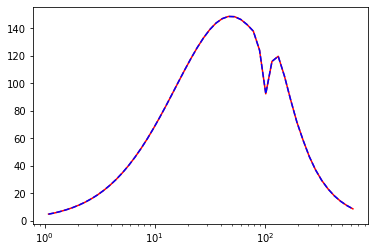

In [40]:
plt.semilogx(r, -xi_dd2_num*r**2,'r-')
plt.semilogx(r, -xi_dd2_cutoff*r**2,'b--')

In [41]:
xi_vv0_num = np.loadtxt(path+'/results/xi_vv_num_integral.txt',usecols=(1))
xi_vv2_num = np.loadtxt(path+'/results/xi_vv_num_integral.txt',usecols=(2))

In [42]:
# xi_vv monopole cut off

xi = lambda r, k: P_k(k)*np.sin(k*r)/k
                
dk = 1e-4
xi_vv0_cut = np.full_like(r,0) 
ii = 0

for rr in r:
    xi_r = 0
    for i in range (1, ni):              #notice when choosing i to avoid divided by r=0
        xi_r = xi_r + xi(rr,i*dk)
    xi_vv0_cut[ii] = xi_r*dk/(6*np.pi**2*rr)*f**2
    ii = ii+1

In [43]:
# xi_vv quadrupole cut off

xi = lambda r, k: P_k(k)*(np.sin(k*r)/(k*r)*(3/(k*r)**2-1) - 3*np.cos(k*r)/(k*r)**2)
                
dk = 1e-4
xi_vv2_cut = np.full_like(r,0) 
ii = 0

for rr in r:
    xi_r = 0
    for i in range (1, ni):              #notice when choosing i to avoid divided by r=0
        xi_r = xi_r + xi(rr,i*dk)
    xi_vv2_cut[ii] = -xi_r*dk/(3*np.pi**2)*f**2
    ii = ii+1

In [44]:
xi_vv0_cutoff = xi_vv0_num - xi_vv0_cut
xi_vv2_cutoff = xi_vv2_num - xi_vv2_cut

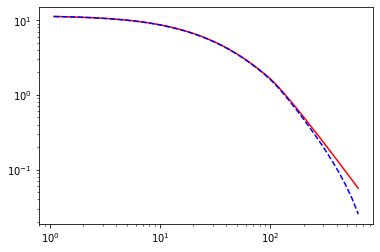

In [45]:
plt.loglog(r, xi_vv0_num,'r-')
plt.loglog(r, xi_vv0_cutoff,'b--')

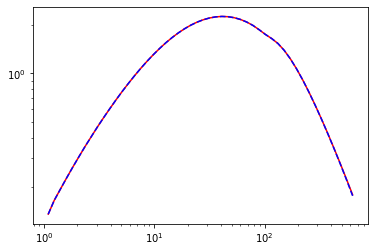

In [46]:
plt.loglog(r, -xi_vv2_num,'r-')
plt.loglog(r, -xi_vv2_cutoff,'b--')

Other ways: 
    
1. Cut the power spectrum at k_min then do the integral
2. Calculate the integral (by hand) then subtract it (the idea likes the previous way)

In [4]:
#xi_theory with cut at k_min (cut P(k) after integral)

h0 = HankelTransform(nu=1./2., N = 3000, h = 1e-5)
f1 = lambda k: P_k(k)/(k*np.pi*2.)**(3./2.)

i=0
xi_cut = np.zeros(len(r))
xi_p1 = 1/np.sqrt(r)*h0.transform(f1,r, ret_err=False, inverse=True)

for rr in r:
    if kk[i] < k_min:
        cut = 3.e6/(2.*np.pi**2.*rr**2.)*(1.-np.cos(k_min*rr))
        xi_cut[i] = xi_p1[i] - cut
    else:
        xi_cut[i] = xi_p1[i]
    i = i+1
    
xi_cut =  f**2*xi_cut/3

In [5]:
r_vv0       = np.loadtxt(path+'/my-p-code/xi_vv_realspace_mono.txt', usecols = 0)
xi_vv0      = np.loadtxt(path+'/my-p-code/xi_vv_realspace_mono.txt', usecols = 1)
error_xi_vv0= np.loadtxt(path+'/my-p-code/xi_vv_realspace_mono.txt', usecols = 2)
xi_vv0_lin   = np.loadtxt(path+'/my-p-code/xi_vv_realspace_theory.txt', usecols = 1)

In [6]:
#cut P(k) before integral

for i in range(0,len(kk)):
    if kk[i] < k_min:
        P[i] = 0
P_k = spline(kk, P)


In [7]:
h0 = HankelTransform(nu=1./2., N = 3000, h = 1e-5)
f1 = lambda k: P_k(k)/(k*np.pi*2.)**(3./2.)

xi_p1 = 1/np.sqrt(r)*h0.transform(f1,r, ret_err=False, inverse=True)
    
xi_cut_before =  f**2*xi_p1/3

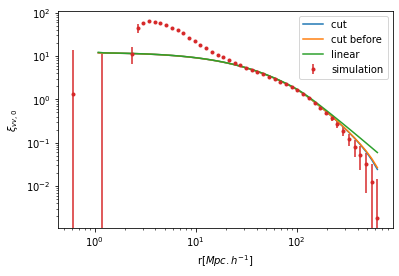

In [12]:
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(r,xi_cut, label='cut ')
ax.plot(r,xi_cut_before, label='cut before')
ax.plot(r,xi_vv0_lin, label='linear ')
ax.errorbar(r_vv0,xi_vv0, fmt='.',yerr = error_xi_vv0, label = 'simulation')
ax.set_ylabel("$\\xi_{vv,0}$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
#ax.set_xlim(10,)
ax.legend()

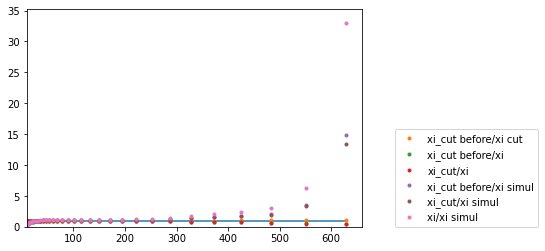

In [9]:
y = np.full_like(r,1)
plt.plot(r,y)
plt.plot(r,xi_cut_before/xi_cut, '.', label ='xi_cut before/xi cut')
plt.plot(r,xi_cut_before/xi_vv0_lin, '.',label='xi_cut before/xi')
plt.plot(r,xi_cut/xi_vv0_lin, '.', label ='xi_cut/xi')
plt.plot(r,xi_cut_before/xi_vv0, '.',label='xi_cut before/xi simul')
plt.plot(r,xi_cut/xi_vv0, '.', label ='xi_cut/xi simul')
plt.plot(r,xi_vv0_lin/xi_vv0, '.', label ='xi/xi simul')
plt.xlim(10,)
plt.ylim(0,)
plt.legend(loc=(1.1,0))